In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
# api
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:22<00:00, 38.8MB/s]
100% 812M/812M [00:22<00:00, 38.4MB/s]


In [3]:
# Extracting the compresed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The Data set is extracted")

The Data set is extracted


In [4]:
from zipfile import ZipFile

dataset = '/content/train.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The Data set is extracted")

The Data set is extracted


In [5]:
import os
#counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print("Number of images: ", file_count)

Number of images:  25000


In [6]:
names = os.listdir('/content/train')
print(names)

['cat.9402.jpg', 'cat.2156.jpg', 'dog.3070.jpg', 'cat.286.jpg', 'dog.10072.jpg', 'dog.5683.jpg', 'cat.10794.jpg', 'dog.3131.jpg', 'cat.4666.jpg', 'cat.4603.jpg', 'dog.11013.jpg', 'cat.6396.jpg', 'dog.2789.jpg', 'dog.8637.jpg', 'cat.6921.jpg', 'dog.9312.jpg', 'dog.3400.jpg', 'dog.11224.jpg', 'dog.11057.jpg', 'cat.67.jpg', 'cat.12046.jpg', 'cat.2627.jpg', 'dog.2156.jpg', 'cat.10957.jpg', 'dog.9555.jpg', 'dog.5697.jpg', 'cat.12338.jpg', 'dog.3756.jpg', 'cat.5266.jpg', 'cat.7497.jpg', 'dog.403.jpg', 'dog.8096.jpg', 'dog.6054.jpg', 'dog.9466.jpg', 'cat.628.jpg', 'cat.7729.jpg', 'cat.9189.jpg', 'dog.3248.jpg', 'dog.3667.jpg', 'cat.11775.jpg', 'dog.2816.jpg', 'cat.3932.jpg', 'dog.2397.jpg', 'dog.10297.jpg', 'cat.5886.jpg', 'cat.8654.jpg', 'dog.2290.jpg', 'dog.8521.jpg', 'dog.9356.jpg', 'dog.4314.jpg', 'dog.4238.jpg', 'cat.2937.jpg', 'cat.5193.jpg', 'cat.4767.jpg', 'dog.11111.jpg', 'dog.7347.jpg', 'dog.12.jpg', 'cat.3407.jpg', 'cat.934.jpg', 'cat.1726.jpg', 'cat.3858.jpg', 'dog.9041.jpg', 'dog

In [7]:
dog_count = 0
cat_count = 0
for i in names:
  name = i[0:3]
  if name == 'dog':
    dog_count += 1
  else:
    cat_count += 1

print("Dog Images: ", dog_count)
print("Cat Images: ", cat_count)

Dog Images:  12500
Cat Images:  12500


In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

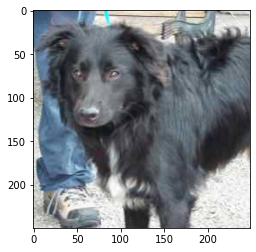

In [9]:
#Displaying the image of dog 
img = mpimg.imread('/content/train/dog.10084.jpg')
plt.imshow(img)

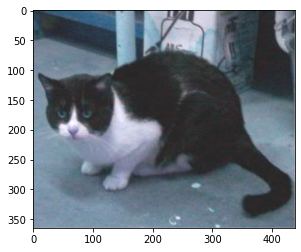

In [10]:
#Displaying the image of cat 
import cv2
img = cv2.imread('/content/train/cat.2048.jpg')
plt.imshow(img)

In [11]:
 # Creating a new directory for resized images

os.mkdir('/content/resized_image')

In [12]:
original_folder = '/content/train/'
resized_folder = '/content/resized_image/'

for i in range(1500):
  filename = os.listdir(original_folder)[i]
  image_path = original_folder + filename

  image = Image.open(image_path)
  image = image.resize((224, 224))
  image = image.convert('RGB')

  new_image_path = resized_folder + filename
  image.save(new_image_path)

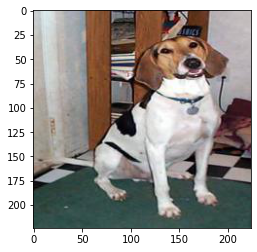

In [16]:
#Displaying the Resized image of dog 
img = mpimg.imread('/content/resized_image/dog.11127.jpg')
plt.imshow(img)

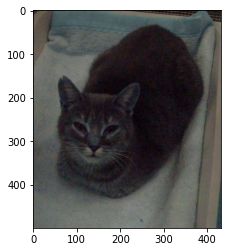

In [17]:
  #Displaying the image of cat 
import cv2
img = cv2.imread('/content/train/cat.8023.jpg')
plt.imshow(img)

DOG --> 1

CAT --> 0

In [18]:
# Creating lables for the Cats and Dogs
#Creating for loop to assign lables

file_names = os.listdir('/content/resized_image/')

labels = []

for i in range(1500):
  file_name = file_names[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)


In [19]:
print(file_names[0:10])
print(len(file_names))

['cat.9402.jpg', 'cat.2156.jpg', 'dog.3070.jpg', 'cat.286.jpg', 'dog.10072.jpg', 'dog.5683.jpg', 'cat.10794.jpg', 'dog.3131.jpg', 'cat.4666.jpg', 'cat.4603.jpg']
1500


In [20]:
print(labels[0:10])
print(len(labels))

[0, 0, 1, 0, 1, 1, 0, 1, 0, 0]
1500


In [21]:
# Now we will count how many dog images and Cat images

values, counts = np.unique(labels, return_counts = True)
print(values)
print(counts)

[0 1]
[726 774]


In [22]:
import cv2
import glob

**Converting the resized images to numpy**

In [23]:
image_directory = '/content/resized_image/'
image_extension = ['jpg']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

array_images = np.asarray([cv2.imread(file) for file in files])

In [24]:
print(array_images)

[[[[121 140 147]
   [121 140 147]
   [132 150 157]
   ...
   [155 167 171]
   [153 165 169]
   [153 165 169]]

  [[121 140 147]
   [121 140 147]
   [132 150 157]
   ...
   [155 167 171]
   [154 166 170]
   [153 165 169]]

  [[122 141 148]
   [121 140 147]
   [131 149 156]
   ...
   [154 166 170]
   [154 166 170]
   [153 165 169]]

  ...

  [[122 136 148]
   [147 161 173]
   [141 154 168]
   ...
   [179 193 199]
   [182 194 200]
   [182 194 200]]

  [[124 138 150]
   [146 160 172]
   [137 150 164]
   ...
   [181 195 201]
   [183 195 201]
   [183 195 201]]

  [[129 143 155]
   [143 157 169]
   [131 144 158]
   ...
   [181 195 201]
   [183 195 201]
   [183 195 201]]]


 [[[138 122 123]
   [140 124 125]
   [141 125 126]
   ...
   [ 54  71 104]
   [ 50  67 100]
   [ 47  64  97]]

  [[140 124 125]
   [140 124 125]
   [140 124 125]
   ...
   [ 50  69 102]
   [ 48  65  98]
   [ 44  63  96]]

  [[143 127 128]
   [140 124 125]
   [138 122 123]
   ...
   [ 50  71 103]
   [ 48  67 100]
   [ 45  66

In [25]:
type(array_images)

numpy.ndarray

In [26]:
print(array_images.shape)

(1500, 224, 224, 3)


In [27]:
X = array_images
Y = np.array(labels)

**Train and Test Split**

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [29]:
# Scalling

X_train_scale = X_train/255

X_test_scale = X_test/255

**Neural Network (Mobile Net)**

In [30]:
import tensorflow as tf
import tensorflow_hub as hub

In [31]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape = (224, 224, 3), trainable=False)

In [32]:
num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [34]:
model.compile(
    optimizer = 'RMSprop',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['acc']
)

In [35]:
model.fit(X_train_scale, Y_train, epochs=15)

Epoch 1/15
38/38 [==============================] - 14s 55ms/step - loss: 0.1815 - acc: 0.9367
Epoch 2/15
38/38 [==============================] - 2s 44ms/step - loss: 0.0793 - acc: 0.9750
Epoch 3/15
38/38 [==============================] - 2s 42ms/step - loss: 0.0615 - acc: 0.9792
Epoch 4/15
38/38 [==============================] - 2s 42ms/step - loss: 0.0424 - acc: 0.9867
Epoch 5/15
38/38 [==============================] - 2s 42ms/step - loss: 0.0374 - acc: 0.9892
Epoch 6/15
38/38 [==============================] - 2s 42ms/step - loss: 0.0288 - acc: 0.9925
Epoch 7/15
38/38 [==============================] - 2s 43ms/step - loss: 0.0242 - acc: 0.9942
Epoch 8/15
38/38 [==============================] - 2s 43ms/step - loss: 0.0202 - acc: 0.9942
Epoch 9/15
38/38 [==============================] - 2s 43ms/step - loss: 0.0145 - acc: 0.9975
Epoch 10/15
38/38 [==============================] - 2s 43ms/step - loss: 0.0125 - acc: 0.9967
Epoch 11/15
38/38 [==============================] - 2s 43

In [36]:
score, acc = model.evaluate(X_test_scale, Y_test)
print("Test Loss = ", score)
print("Test Accuracy = ", acc)

10/10 [==============================] - 1s 77ms/step - loss: 0.0648 - acc: 0.9767
Test Loss =  0.06483500450849533
Test Accuracy =  0.9766666889190674


**Predictive System**

path of the image to be predicted: /content/download_dog.jpeg


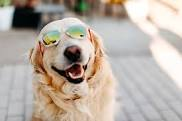

1/1 [==============================] - 0s 23ms/step
[[-5.511277  5.474836]]
The Image Represents Dog


In [48]:
# MOBILENET
input_image_path = input("path of the image to be predicted: ")
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image, (224, 224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])
input_prediction = model.predict(image_reshaped)
print(input_prediction)
input_predict_label = np.argmax(input_prediction)
# print(input_predict_label)

if input_predict_label == 0:
  print("The Image Represents Cat")
else:
  print("The Image Represents Dog")